# Kunitz domain notebook. 
The Kunitz domain is a family of protease inhibitors. It is one of the simplest and shortest ($N = 53$) domain, with a well-known secondary and tertiary structure (2 beta strands, 2 alpha-helices, 3 disulfide bridges). We show here some features found by the algorithm, as well as contact predictions.

## Loading data and packages

../source/numba_utilities.py:1124: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dmean_v_dw = np.dot(s1.T, V)
../source/numba_utilities.py:1125: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  dvar_e_dw = np.dot(s2.T, V)
../source/numba_utilities.py:1126: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 2d, F), array(float32, 2d, A))
  tmp3 = np.dot(s3.T, V)
../source/numba_utilities.py:961: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float32, 1d, A), array(float32, 2d, A))
  mean_V = np.dot(weights, V) / sum_weights


First five sequences of the alignment:
['FCYLEEDVGICRGLISRYFYNNQSKQCEEFKYGGCLGNENNFESLEECKRTC-', 'VCDLERDAGPCLDPISQWYFDRVSSACKLFTYGGCRGNANRFNTKSECEARC-', 'VCMQPIESGRCLAYIPRYAFDANLGKCVKFIYGGCGGNGNNFETKNECRSAC-', '-------------ISTRYYYNPIDGQCHPFTYNGFLGNFNNFHSQADCQMYC-', 'ACSVPLAPGTGDAGLARWYYSSDEKACVPFQYNGMRGNKNNFLSQSDCERIC-']
First five sequences of the alignment (numerical format)
[[ 4  1 19  9  3  3  2 17  5  7  1 14  5  9  7 15 14 19  4 19 11 11 13 15
   8 13  1  3  3  4  8 19  5  5  1  9  5 11  3 11 11  4  3 15  9  3  3  1
   8 14 16  1 20]
 [17  1  2  9  3 14  2  0  5 12  1  9  2 12  7 15 13 18 19  4  2 14 17 15
  15  0  1  8  9  4 16 19  5  5  1 14  5 11  0 11 14  4 11 16  8 15  3  1
   3  0 14  1 20]
 [17  1 10 13 12  7  3 15  5 14  1  9  0 19  7 12 14 19  0  4  2  0 11  9
   5  8  1 17  8  4  7 19  5  5  1  5  5 11  5 11 11  4  3 16  8 11  3  1
  14 15  0  1 20]
 [20 20 20 20 20 20 20 20 20 20 20 20 20  7 15 16 14 19 19 19 11 12  7  2
   5 13  1  6 12  4 16 19 11  5  4  9  5 11  4

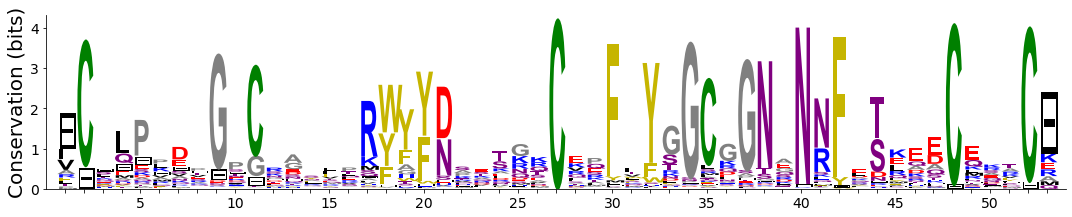

In [1]:
import sys
sys.path.append('../source/')
sys.path.append('../utilities/')
from common_imports import set_num_threads
set_num_threads(2) # Set the number of cores. Must be executed before importing numpy&numba.
import matplotlib.pyplot as plt
%matplotlib inline    
import numpy as np
import rbm,utilities
import pandas as pd
import Proteins_utils, RBM_utils, utilities,sequence_logo,plots_utils


filename = 'Kunitz_domain_MSA.fasta'
path = u'../data/Kunitz/'


all_data = Proteins_utils.load_FASTA(path+filename,drop_duplicates=True)

print('First five sequences of the alignment:')
print(Proteins_utils.num2seq(all_data[:5]))

print('First five sequences of the alignment (numerical format)')
print(all_data[:5])

seed = utilities.check_random_state(0) 
permutation = np.argsort(seed.rand(all_data.shape[0]))
all_data = all_data[permutation] # Shuffle data.

num_neighbours= Proteins_utils.count_neighbours(all_data)
all_weights = (1.0/num_neighbours).astype(np.float32)


mu = utilities.average(all_data,c=21,weights=all_weights)

sequence_logo.Sequence_logo(mu,ticks_every=5);




In [2]:
n_v = 53 # Number of visible units; = # sites in alignment.
n_h = 100 # Number of hidden units.
visible = 'Potts' # Nature of visible units potential. Here, Potts states...
n_cv = 21 # With n_cv = 21 colors (all possible amino acids + gap)
hidden = 'dReLU' # Nature of hidden units potential. Here, dReLU potential.

RBM = rbm.RBM(visible = visible,hidden = hidden,n_v = n_v,n_h = n_h, n_cv = n_cv)

batch_size = 100 # Size of mini-batches (and number of Markov chains used). Default: 100.
n_iter = 1000 # Number of epochs
learning_rate = 5e-3 # Initial learning rate (default: 5e-3)
decay_after = 0.5 # Decay learning rate after 50% of iterations (default: 0.5)
l1b = 0.25 # L1b regularization. Default : 0.
N_MC = 1 # Number of Monte Carlo steps between each update

RBM.fit(all_data, weights= all_weights, batch_size = batch_size,
    n_iter = n_iter, l1b = l1b, N_MC = N_MC,
   decay_after = decay_after, verbose = 0,vverbose=1 )


Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32


../source/layer.py:1152: RuntimeWarning: overflow encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))
../source/layer.py:1189: RuntimeWarning: overflow encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))


Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54


../source/layer.py:1151: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)
../source/layer.py:1188: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)


Starting epoch 55
Starting epoch 56
Starting epoch 57
Starting epoch 58
Starting epoch 59
Starting epoch 60
Starting epoch 61
Starting epoch 62
Starting epoch 63
Starting epoch 64
Starting epoch 65
Starting epoch 66
Starting epoch 67
Starting epoch 68
Starting epoch 69
Starting epoch 70
Starting epoch 71
Starting epoch 72
Starting epoch 73
Starting epoch 74
Starting epoch 75
Starting epoch 76
Starting epoch 77
Starting epoch 78
Starting epoch 79
Starting epoch 80
Starting epoch 81
Starting epoch 82
Starting epoch 83
Starting epoch 84
Starting epoch 85
Starting epoch 86
Starting epoch 87
Starting epoch 88
Starting epoch 89
Starting epoch 90
Starting epoch 91
Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting epoch 98
Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109


{}

## Evaluate accuracy of training: Train and test set likelihood

In [3]:
RBM.AIS(n_betas=20000,verbose=1) # Compute partition function with annealed importance sampling
print(utilities.average(RBM.likelihood(all_data), weights=all_weights)/53)



Initial evaluation: log(Z) = [580.10254]
Mismatch dimensions (100, 100), [10, 100], reinitializating I
Mismatch dimensions (100, 53, 21), [10, 53, 21], reinitializating I
Iteration 2000, beta: 0.10000500025001251
Current evaluation: log(Z)= 583.74677 +- 0.00676088007501267
Iteration 4000, beta: 0.20001000050002501
Current evaluation: log(Z)= 588.8849 +- 0.009850092664404984
Iteration 6000, beta: 0.3000150007500375
Current evaluation: log(Z)= 595.0487 +- 0.01192389347854279
Iteration 8000, beta: 0.40002000100005003
Current evaluation: log(Z)= 601.98474 +- 0.011606980630299107
Iteration 10000, beta: 0.5000250012500626
Current evaluation: log(Z)= 609.5757 +- 0.01279085333631894
Iteration 12000, beta: 0.600030001500075
Current evaluation: log(Z)= 617.72687 +- 0.01434403694192133
Iteration 14000, beta: 0.7000350017500875
Current evaluation: log(Z)= 626.41 +- 0.016157098578087784
Iteration 16000, beta: 0.8000400020001001
Current evaluation: log(Z)= 635.61914 +- 0.015914835783065667
Iteration

# Selecting interesting hidden units.
Since the learning process is stochastic, each training produces different weights.
An important part resides in selecting potentially important features. Here, our selection is based on the following criteria:

- Hidden unit importance score. Similarly to PCA, hidden units contribute differently to the likelihood.

- Weight sparsity. Sparser weights are often easier to interpretate.

- Gap fraction. For real protein families, some hidden units model extended gap modes. Most of them are not functionally relevant, we want to discard them.

- Jump and asymmetry of the hidden unit non-linearity <h_\mu | I_\mu>. When using dReLU potentials, the shape of the non-linearity adapts to the hidden unit input statistics. Hidden units with large jumps often have a bimodal input distribution. Such hidden units partition the sequence space into subgroups that could have distinct functionality. When the asymmetry is strong, one of the subgroups is usually much smaller.





../source/layer.py:1151: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)
../source/layer.py:1152: RuntimeWarning: overflow encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))


Mismatch dimensions (10, 100), [500, 100], reinitializating I
Mismatch dimensions (10, 53, 21), [500, 53, 21], reinitializating I


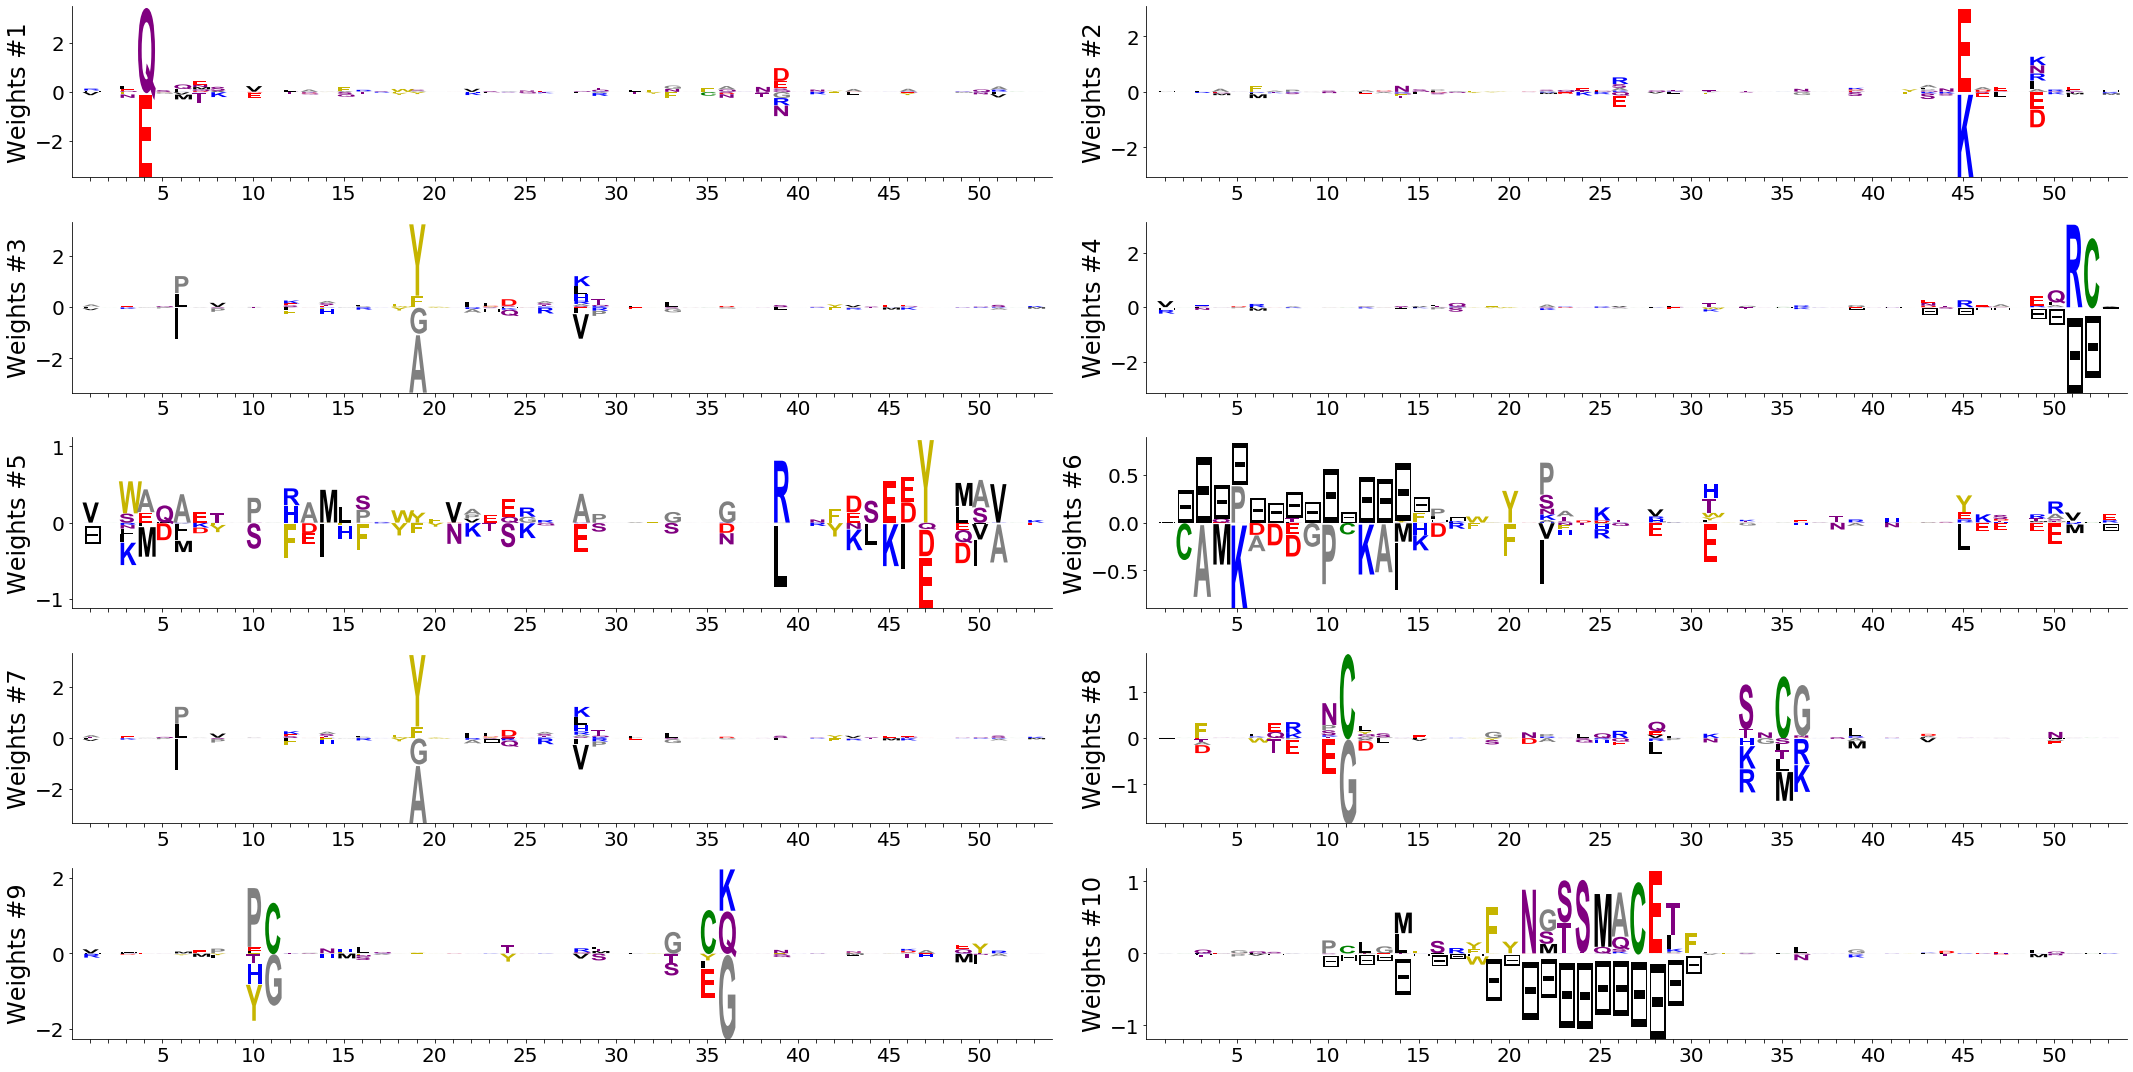

In [4]:
# Feature importance.    
from moi import KMPP_choose_centroids
def get_feature_importance(RBM,data,weights=None,Nchains=500,Nthermalize=1000,Nstep=10,Lchains=100,init='data'):
    if init == 'data':
        h = RBM.mean_hiddens(data)
        initial_points = data[KMPP_choose_centroids(h,Nchains)]
    else:
        initial_points = []        
    
    data_gen , _ = RBM.gen_data(Nthermalize=Nthermalize,Nchains=Nchains,Nstep=Nstep,Lchains=Lchains,config_init=initial_points)
    
    cgf = RBM.hlayer.cgf_from_inputs(RBM.input_hiddens(data))
    cgf_gen = RBM.hlayer.cgf_from_inputs(RBM.input_hiddens(data_gen))
    
    
    DeltaL = utilities.average(cgf,weights=weights) + utilities.logsumexp(-cgf_gen,axis=0) - np.log(len(data_gen))
    return DeltaL

DeltaL = get_feature_importance(RBM,all_data,weights=all_weights,Nchains=500)

# Sparsity
p = RBM_utils.get_sparsity(RBM.weights)

# Jump and asymmetry.
jump = RBM_utils.get_hlayer_jump(RBM)
asymmetry = RBM_utils.get_hlayer_asymmetry(RBM)


# Gap fraction
gap_fraction = RBM_utils.get_norm_gaps(RBM.weights,a=1)/RBM_utils.get_norm(RBM.weights,a=1)


i1 = np.argsort(p)[0] # Low sparsity unit.
i2 = np.argsort(p)[1] # Low sparsity unit.
i3 = np.argsort(p)[2] # Low sparsity unit.
i4 = np.argsort(p)[10] # Intermediate sparsity unit.
i5 = np.argsort(p)[50] # Intermediate sparsity unit.
i6 = np.argmax(  jump + 10* (asymmetry>0.5) - 100. * (gap_fraction<0.3) ) # "Outlier" unit (high asymmetry+large jump); not gap mode.
i7 = np.argsort(100. * (gap_fraction<0.25) + DeltaL)[-3] # High Delta L contribution, not a gap mode.
i8 = np.argsort(100. * (gap_fraction<0.25) + DeltaL)[-2] # High Delta L contribution, not a gap mode.
i9 = np.argsort(100. * (gap_fraction<0.25) + DeltaL)[-1] # High Delta L contribution, not a gap mode.
i10 = np.argsort(gap_fraction)[-1] # One gap mode.

interesting_features = [i1,i2,i3,i4,i5,i6,i7,i8,i9,i10]

nsites = len(interesting_features)
fig = sequence_logo.Sequence_logo_multiple(RBM.weights[interesting_features],ncols=2
                                           ,ticks_every=5,ticks_labels_size=20,title_size=24);





## Visualizing hidden units: Distribution of inputs and non-linearity.
Protein sequences cluster according to the projections onto the weights.

../utilities/plots_utils.py:92: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax2_.hist(I[:,subset[i]],normed=True,weights=weights,bins=100)


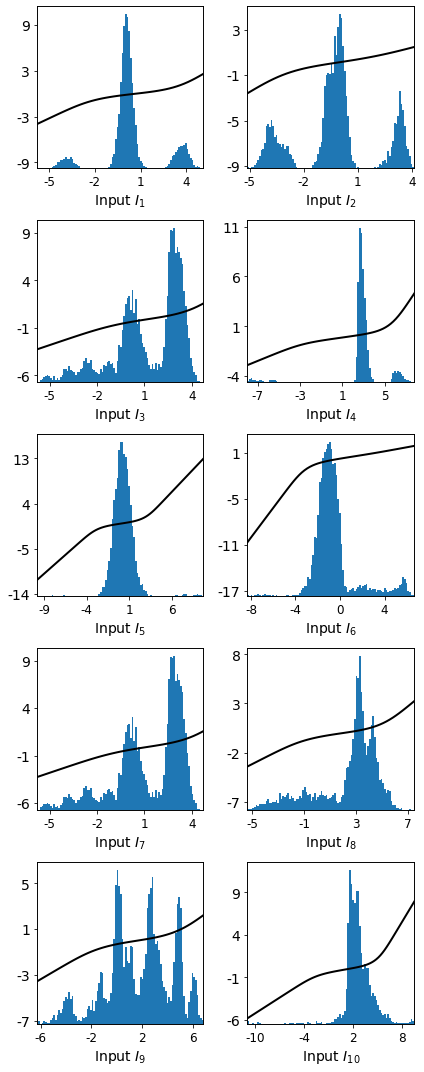

In [5]:
## Display their histograms of activations.

I = RBM.input_hiddens(all_data) # compute hidden unit input.
# Show inputs histogram and conditional means
plots_utils.plot_input_mean(RBM,I, interesting_features,ncols=2); 

## Visualizing hidden units: Phylogenic activity.
Are the features active across all, or only a portion of the phylogenic tree ? To assess this, we pick for each hidden unit the 20 sequences with highest $I_\mu$ (or lowest, depending on the sign of the non-linearity), and compute the distances between each pair. We compare to the background distribution of pairwise distances

../utilities/plots_utils.py:320: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(all_distances,bins=RBM.n_v,normed=True,range=(0,1),color = 'gray',alpha = 0.5)
../utilities/plots_utils.py:321: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(distance_top_features[subset[i]],bins=RBM.n_v,normed=True,range=(0,1),alpha=0.5)


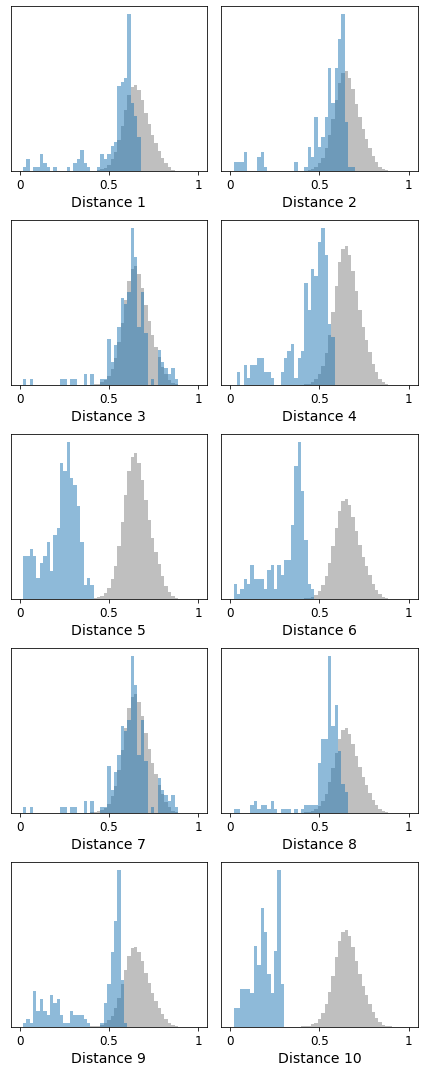

In [6]:
# Compute histogram of distances between top-activating sequences.
plots_utils.plot_top_activating_distance(RBM, I,all_data,interesting_features,ncols=2);

# Visualize all weights into a single pdf
Make all the previous plots, for all hidden units into a single pdf. In addition, optionally displays the weight on a structure (provide either a pdb id or path to a pdb file).
Requirements:
- With or without the structures: pdfjoin (command line utility).
- For displaying the structure:
    - the Biopython package for parsing structure files.
    - HMMER for aligning the pdb sequence to the alignment.
    - Chimera.
- Change the paths in Proteins_3D_utils.py



In [6]:
# RBM = RBM_utils.loadRBM('RBM_Kunitz.data')
import importlib;
import Proteins_3D_utils; importlib.reload(Proteins_3D_utils)

<module 'Proteins_3D_utils' from '../utilities/Proteins_3D_utils.py'>

In [7]:
with_structure  = True

if with_structure:
    plots_utils.make_all_weights(RBM,all_data,pdb_file='2knt',
                                 weights=all_weights,name = 'all_weights_Kunitz.pdf',
                                 weights_per_page = 10);
else:
    plots_utils.make_all_weights(RBM,all_data,
                                 weights=all_weights,name = 'all_weights_Kunitz.pdf',
                                 weights_per_page = 10);

../source/layer.py:1151: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)
../source/layer.py:1152: RuntimeWarning: overflow encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))


2knt is a PDB id
/Volumes/Carte_SD/PDB_files/pdb2knt.ent has 1 chains
['A']
Learning the mapping between MSA columns and PDB sequence index from the alignment...
Iteration 1: etdICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVC-apv,
53
Iteration 1, fraction of sites mapped on the structure: 0.98
Iteration 2: etdICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCApv,
53
Iteration 2, fraction of sites mapped on the structure: 1.00
Iteration 3: etdICKLPKDEGTCRDFILKWYYDPNTKSCARFWYGGCGGNENKFGSQKECEKVCApv,
53
Iteration 3, fraction of sites mapped on the structure: 1.00
Mapping learnt...


../utilities/plots_utils.py:92: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax2_.hist(I[:,subset[i]],normed=True,weights=weights,bins=100)
../utilities/plots_utils.py:320: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(all_distances,bins=RBM.n_v,normed=True,range=(0,1),color = 'gray',alpha = 0.5)
../utilities/plots_utils.py:321: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax_.hist(distance_top_features[subset[i]],bins=RBM.n_v,normed=True,range=(0,1),alpha=0.5)


Make all weights: Done.


# Contact predictions with RBM
RBM can predict contact maps like Boltzmann Machines. First, we compute an effective coupling matrix from the epistasis landscape. Then we use it to predict contact maps using the Frobenius norm and the Average Product Correction. 

../source/layer.py:1188: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1 / (1 + (etg_minus / np.sqrt(self._gamma_minus)
../source/layer.py:1189: RuntimeWarning: overflow encountered in true_divide
  ) / (etg_plus / np.sqrt(self._gamma_plus)))
/specific/netapp5_2/iscb/wolfson/jeromet/v_env/p36_tf/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/specific/netapp5_2/iscb/wolfson/jeromet/v_env/p36_tf/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


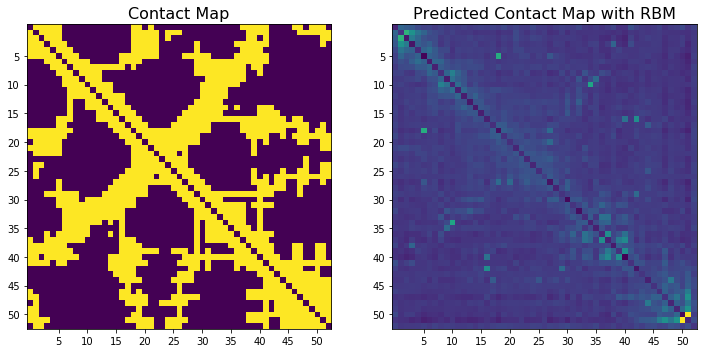

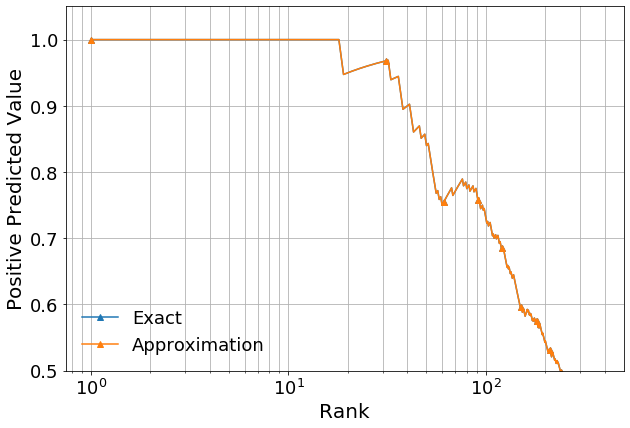

In [8]:
## Make contact predictions.

from scipy.io import loadmat
contact_map = loadmat(path+'contact_map14_extended.mat')['cm'] > 0 
contact_map += contact_map.T # Load contact map.



Jeff_approx = RBM_utils.get_effective_couplings_approx(RBM,all_data,weights=all_weights) # Fast approximation of J_eff using a Taylor expansion of the cumulant generating function Phi.
Jeff = Jeff_approx.copy()

# Jeff = RBM_utils.get_effective_couplings_exact(RBM,all_data,weights=all_weights) # Full computation, by averaging the epistasis landscapes for all sequences in the alignment. Very slow in the new version; due to incompatibility between multiprocessing.Pool and numba, cannot use parallel computing.


F_approx = Proteins_utils.couplings_to_contacts(Jeff_approx,with_gaps=True)
F = Proteins_utils.couplings_to_contacts(Jeff,with_gaps=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
ax[0].imshow(contact_map)
ax[0].set_xticks([5,10,15,20,25,30,35,40,45,50])
ax[0].set_yticks([5,10,15,20,25,30,35,40,45,50])
ax[0].set_title('Contact Map',fontsize=16)


ax[1].imshow(F)
ax[1].set_xticks([5,10,15,20,25,30,35,40,45,50])
ax[1].set_yticks([5,10,15,20,25,30,35,40,45,50])
ax[1].set_title('Predicted Contact Map with RBM',fontsize=16)
fig.show()



N = 53

for i in range(N): # keep only contacts distant on the chain.
    for j in range(N):
        if np.abs(i-j) <5:
            contact_map[i,j] = 0
            F[i,j] = 0            
            F_approx[i,j] = 0

correct = Proteins_utils.compare_contact_maps(F,contact_map)
correct_approx = Proteins_utils.compare_contact_maps(F_approx,contact_map)
n_contacts = contact_map.sum()/2
xaxis = np.arange(1,n_contacts+1)
fig, ax = plt.subplots()
fig.set_figheight(6.7)
fig.set_figwidth(10)
ax.semilogx(xaxis,correct,label='Exact',marker='^',markevery=30)
ax.semilogx(xaxis,correct_approx,label='Approximation',marker='^',markevery=30)
for tl in ax.get_yticklabels():
 tl.set_fontsize(18)
for tl in ax.get_xticklabels():
 tl.set_fontsize(18)
ax.grid(True,which='both');
plt.xlabel('Rank',fontsize=20);
plt.ylabel('Positive Predicted Value',fontsize=20);
plt.ylim([0.5,1.05])
plt.legend(fontsize=18,loc='lower left',ncol=1,frameon=False)
fig.show()

